In [1]:
import pandas as pd

# Load the dataset (adjust the file path if necessary)
data = pd.read_csv('creditcard.csv')

# Show the first few rows to ensure it's loaded correctly
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
# Check for basic information about the dataset
print(data.info())

# Check for null values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Handle missing values (if any)
# In this case, no missing values, but if there were, we'd fill them:
# data = data.fillna(data.mean()) # Or drop them using data.dropna()

# Step 3: Scale the 'Amount' column using StandardScaler (as it's on a different scale compared to other features)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Step 4: Check for class imbalance (fraud vs. non-fraud)
print("\nClass distribution:")
print(data['Class'].value_counts())

# Step 5: Handle outliers (for this example, we'll use the IQR method)
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data = data[(data['Amount'] >= (Q1 - 1.5 * IQR)) & (data['Amount'] <= (Q3 + 1.5 * IQR))]

# Step 6: Feature Engineering (optional)
# For this dataset, we may not need additional features, but if needed, we could create new ones.

# Step 7: Save the cleaned dataset
data.to_csv('cleaned_creditcard_fraud.csv', index=False)

# Show the first few rows of the cleaned dataset
print("\nCleaned data preview:")
print(data.head())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Cleaned data preview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -

In [4]:

# Load the cleaned dataset
data = pd.read_csv('cleaned_creditcard_fraud.csv')

# Step 1: Feature Selection
# The 'Class' column will be our target variable (fraudulent or not)
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Target (fraudulent = 1, non-fraudulent = 0)

# Step 2: Train-Test Split
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (important for algorithms like Logistic Regression, SVM, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on test data

# Step 4: Save the structured data for model training
# Optionally, you can save the split datasets if you want to use them later:
pd.DataFrame(X_train_scaled, columns=X.columns).to_csv('X_train.csv', index=False)
pd.DataFrame(X_test_scaled, columns=X.columns).to_csv('X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

# Show the first few rows of structured data
print("\nTraining Features (first 5 rows):")
print(X_train_scaled[:5])

print("\nTraining Target (first 5 rows):")
print(y_train.head())




Training Features (first 5 rows):
[[ 1.35624258e+00  1.05000250e+00 -5.00343125e-01 -5.05116370e-01
   2.73597618e-01 -2.93195569e-01  2.76644894e-02 -4.11499007e-01
  -4.80660285e-03  1.05881525e+00  1.15285177e-03 -1.72435124e+00
  -4.72767438e-02  4.96242606e-02 -8.97571378e-02  7.21162633e-01
   7.88249769e-01 -1.00548350e+00 -7.35896856e-02  1.74052769e-01
  -1.79298102e-01 -3.38078588e-01 -9.42199718e-01  6.13671455e-01
  -1.81664955e+00 -9.25605085e-01  9.98784613e-02 -4.96719040e-02
  -1.66773222e-01 -1.17460959e-01]
 [-2.08474240e-01 -1.70525085e+00  2.65739516e+00 -1.17451356e+00
   3.42565924e-01 -7.58453077e-01 -1.05843779e+00  2.39570865e-01
   6.93385500e-01  8.67267366e-01  2.64971653e+00 -4.68940077e-01
   8.57204596e-01  9.96907979e-01  2.42558207e-01  7.13183367e-01
  -7.30901235e-01  6.75624645e-02 -3.79333585e-01  1.08946920e-01
   2.23016487e+00 -2.04920537e-01  7.79059660e-01  4.27920297e-01
   6.30934256e-01 -4.62867895e-01 -1.07973041e+00 -1.65837148e-01
  -2.4

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000)  # max_iter=1000 to avoid convergence warnings
model.fit(X_train_scaled, y_train)

# Step 3: Model Evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate the model with metrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score:  0.9990510270654989

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.82      0.60      0.70        91

    accuracy                           1.00     50581
   macro avg       0.91      0.80      0.85     50581
weighted avg       1.00      1.00      1.00     50581


Confusion Matrix:
[[50478    12]
 [   36    55]]


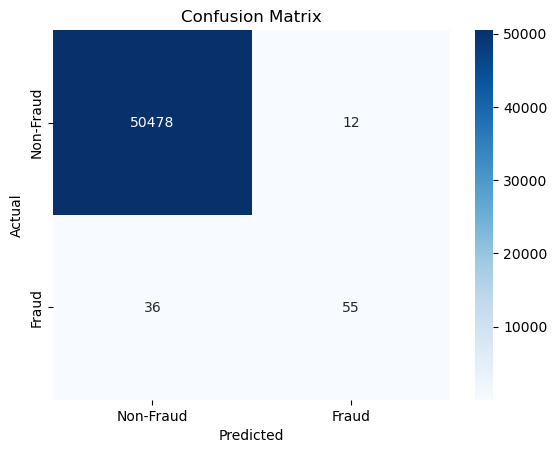

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Logistic Regression Accuracy: 0.9990510270654989
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.82      0.60      0.70        91

    accuracy                           1.00     50581
   macro avg       0.91      0.80      0.85     50581
weighted avg       1.00      1.00      1.00     50581



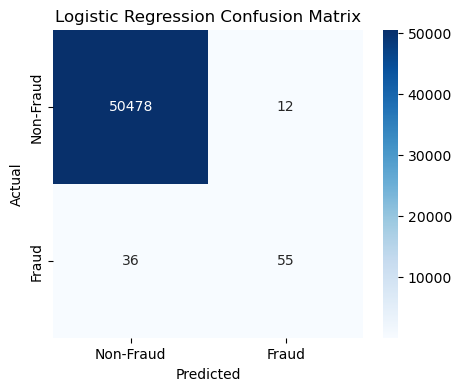


Random Forest Accuracy: 0.9994662027243432
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.93      0.76      0.84        91

    accuracy                           1.00     50581
   macro avg       0.97      0.88      0.92     50581
weighted avg       1.00      1.00      1.00     50581



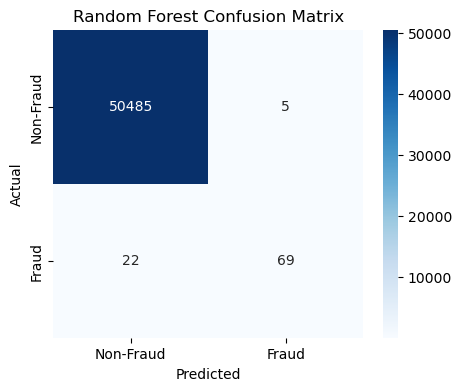


XGBoost Accuracy: 0.9992091892212491
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.79      0.76      0.78        91

    accuracy                           1.00     50581
   macro avg       0.90      0.88      0.89     50581
weighted avg       1.00      1.00      1.00     50581



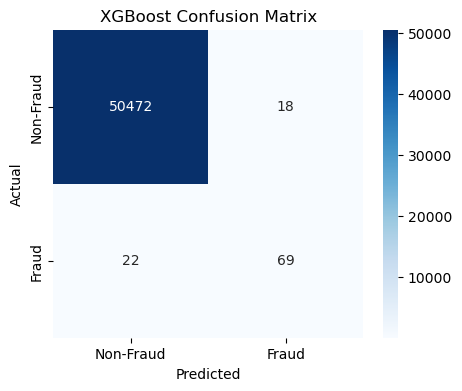


SVM Accuracy: 0.9992685000296554
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.95      0.63      0.75        91

    accuracy                           1.00     50581
   macro avg       0.97      0.81      0.88     50581
weighted avg       1.00      1.00      1.00     50581



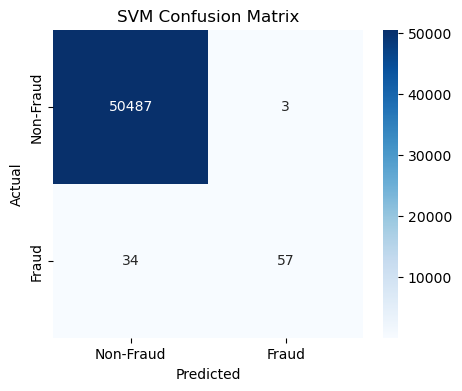


Best Model based on Accuracy: Random Forest with Accuracy: 0.9994662027243432


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss'),
    "SVM": SVC()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Save results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'Confusion Matrix': cm
    }
    
    # Print accuracy and classification report
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:")
    print(class_report)

    # Visualize confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Determine the best model based on accuracy score
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
print(f"\nBest Model based on Accuracy: {best_model_name} with Accuracy: {results[best_model_name]['Accuracy']}")

In [8]:
!git init

Reinitialized existing Git repository in C:/Users/teka/Financial Data Cleaning & Structuring for AI Models/.git/


In [9]:
!git add AImodels.ipynb cleaned_creditcard_fraud.csv creditcard.csv X_test.csv X_train.csv y_test.csv y_train.csv

In [10]:
!git commit -m "Add notebook for process and trained data and kaggle credit card fraud detection"

[main (root-commit) 189b5a6] Add notebook for process and trained data and kaggle credit card fraud detection
 7 files changed, 1044141 insertions(+)
 create mode 100644 AImodels.ipynb
 create mode 100644 X_test.csv
 create mode 100644 X_train.csv
 create mode 100644 cleaned_creditcard_fraud.csv
 create mode 100644 creditcard.csv
 create mode 100644 y_test.csv
 create mode 100644 y_train.csv


In [1]:
!git remote add origin https://github.com/jordanteka/AI-models-structuring-with-credit-card-fraud-detection.git


error: remote origin already exists.


In [11]:
!git config --global http.postBuffer 524288000


In [13]:
!git branch -M main
!git push -u origin main

remote: error: Trace: 32466153dfa7da9bb57678ba9fc0545d6ec75b3a3c24175b9d4cd8205a06d885        
remote: error: See https://gh.io/lfs for more information.        
remote: error: File X_train.csv is 114.32 MB; this exceeds GitHub's file size limit of 100.00 MB        
remote: error: File cleaned_creditcard_fraud.csv is 131.39 MB; this exceeds GitHub's file size limit of 100.00 MB        
remote: error: File creditcard.csv is 143.84 MB; this exceeds GitHub's file size limit of 100.00 MB        
remote: error: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.        
To https://github.com/jordanteka/AI-models-structuring-with-credit-card-fraud-detection.git
 ! [remote rejected] main -> main (pre-receive hook declined)
error: failed to push some refs to 'https://github.com/jordanteka/AI-models-structuring-with-credit-card-fraud-detection.git'


In [15]:
!git lfs install


Updated Git hooks.
Git LFS initialized.


In [17]:
!git lfs track "*.csv"

Tracking "*.csv"


In [21]:
!git add .gitattributes
!git commit -m "Track large CSV files with Git LFS"


[main f68f53a] Track large CSV files with Git LFS
 1 file changed, 1 insertion(+)
 create mode 100644 .gitattributes


In [23]:
!git add AImodels.ipynb cleaned_creditcard_fraud.csv creditcard.csv X_test.csv X_train.csv y_test.csv y_train.csv

In [27]:
!git push origin main

remote: error: Trace: 3060e369a604ba54983b1bbd0f6bed047ec5e387b5fb57d1f82a54030da37a92        
remote: error: See https://gh.io/lfs for more information.        
remote: error: File X_train.csv is 114.32 MB; this exceeds GitHub's file size limit of 100.00 MB        
remote: error: File cleaned_creditcard_fraud.csv is 131.39 MB; this exceeds GitHub's file size limit of 100.00 MB        
remote: error: File creditcard.csv is 143.84 MB; this exceeds GitHub's file size limit of 100.00 MB        
remote: error: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.        
To https://github.com/jordanteka/AI-models-structuring-with-credit-card-fraud-detection.git
 ! [remote rejected] main -> main (pre-receive hook declined)
error: failed to push some refs to 'https://github.com/jordanteka/AI-models-structuring-with-credit-card-fraud-detection.git'
